In [1]:
#libs
import pandas as pd
import seaborn as srn #alguns gráficos
import statistics as sts

In [2]:
#importa os dados
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [6]:
#Registros
dataset.shape

(14, 5)

In [7]:
#Analise exploratorio
#Aparencia
agrupar = dataset.groupby(['Aparencia']).size()
agrupar

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

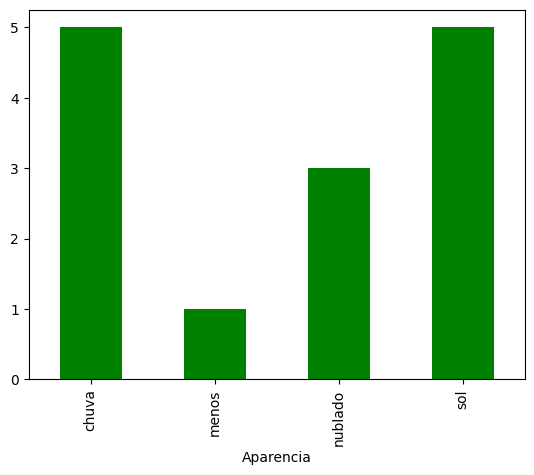

In [8]:
agrupar.plot.bar(color='green')

In [11]:
#Substituir dado fora do dominio pela moda
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
#Visualizar
agrupar = dataset.groupby(['Aparencia']).size()
agrupar

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [12]:
#Temperatura
agrupar = dataset.groupby(['Temperatura']).size()
agrupar

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

<AxesSubplot:xlabel='Temperatura'>

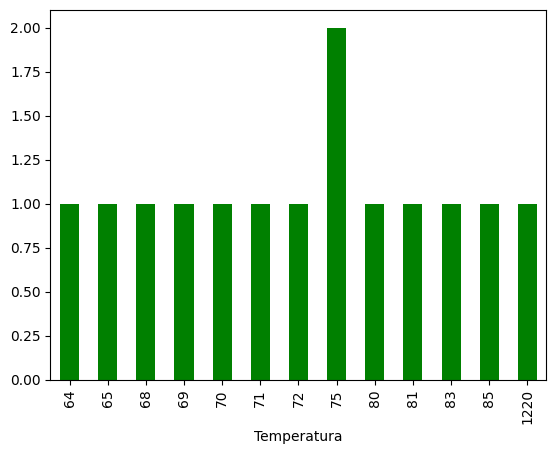

In [14]:
agrupar.plot.bar(color='green')

In [18]:
#Substituir pela moda
dataset.loc[dataset['Temperatura'] > 130, 'Temperatura'] = 75
#visualizar
agrupar = dataset.groupby(['Temperatura']).size()
agrupar

Temperatura
64    1
65    1
68    1
69    1
70    1
71    1
72    1
75    3
80    1
81    1
83    1
85    1
dtype: int64

In [20]:
#Checar NAs
dataset['Temperatura'].isnull().sum()

0

In [26]:
#Umidade
agrupar = dataset.groupby(['Umidade']).size()
agrupar

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [27]:
#valores na
dataset['Umidade'].isnull().sum()

1

In [29]:
#Temperatura a cima de 100, vai para a moda
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = 70.0
#NAs são substituidos pela moda
dataset['Umidade'].fillna(70.0, inplace=True)

agrupar = dataset.groupby(['Umidade']).size()
agrupar

Umidade
65.0    1
70.0    5
75.0    1
80.0    1
85.0    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [30]:
dataset['Umidade'].isnull().sum()

0

In [32]:
agrupar = dataset.groupby(['Vento']).size()
agrupar

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [33]:
dataset['Vento'].isnull().sum()

1

In [35]:
dataset['Vento'].fillna('FALSO', inplace=True)
dataset['Vento'].isnull().sum()

0

In [36]:
agrupar = dataset.groupby(['Jogar']).size()
agrupar

Jogar
nao    5
sim    9
dtype: int64

In [37]:
dataset['Jogar'].isnull().sum()

0

In [40]:
del dataset["Temepratura"]
del dataset['Tempratura']
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,70.0,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,75,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,70.0,FALSO,sim
